# NLP

In [1]:
import nltk

In [2]:
mesages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
len(mesages)

5574

In [5]:
for mes_no, message in enumerate(mesages[:10]):
    print(mes_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

*Feature Analysis*

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [8]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length'] = messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

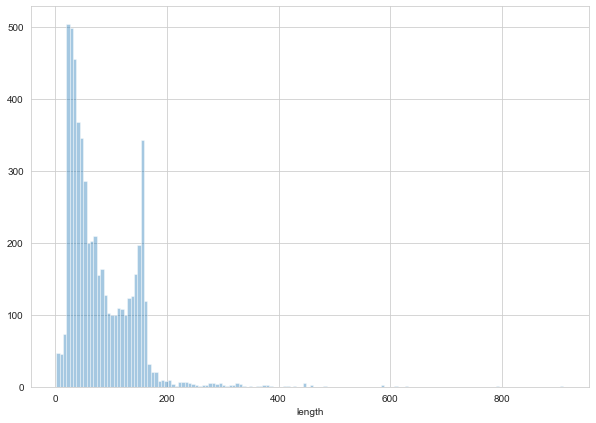

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
sns.distplot(messages['length'], kde=False, bins=150)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4AED288C8>,
      dtype=object)

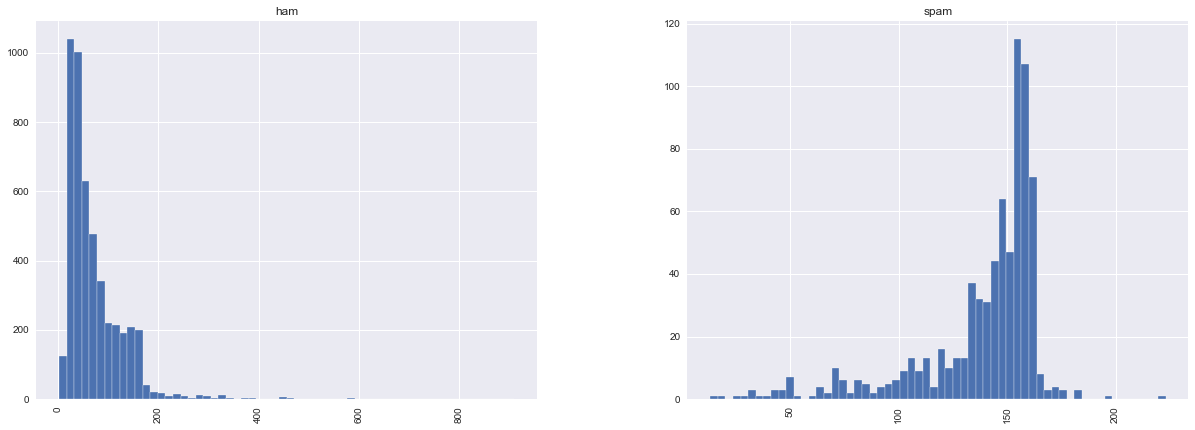

In [19]:
plt.style.use('seaborn')
messages.hist(column='length', by='label', bins=60, figsize=(20, 7))

### Tokenization

*Puntuation Removal*

In [20]:
import string

In [21]:
mess = 'Sample message! Notice: it has punctuation'

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
[c for c in mess if c not in string.punctuation]

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

*Stopword Removal*

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
nopunc = [c for c in mess if c not in string.punctuation]

In [28]:
nopunc = ''.join(nopunc)

In [29]:
nopunc

'Sample message Notice it has punctuation'

In [30]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [31]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

*Note: Creating function for removal of punctuation and stopwords*

In [34]:
def text_process(m):
    """
    1. remove punctuation
    2. remove stoppwords
    3. return list of clean words
    """
    npc = [c for c in m if c not in string.punctuation]
    npc = ''.join(npc)
    clean = [word for word in npc.split() if word not in stopwords.words('english')]
    return clean

In [35]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

### Vectorization

1. Count occurences of every word in each message (Term Frequncy)
2. Weigh the counts, do that frequent tokens get lower weight (Inverse Document Frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 Normalization)

*Term Frequency*

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [39]:
len(bow_transformer.vocabulary_)

11617

In [40]:
mess4 = messages['message'][3]

In [41]:
mess4

'U dun say so early hor... U c already then say...'

In [42]:
bow4 = bow_transformer.transform([mess4])

In [44]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [47]:
bow_transformer.get_feature_names()[9746]

'say'

In [48]:
messages_bow = bow_transformer.transform(messages['message'])

In [49]:
print('Sparese Matrix shape:', messages_bow.shape)

Sparese Matrix shape: (5572, 11617)


In [50]:
messages_bow.nnz

56024

In [52]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.08655038742205227


*Term Frequncy Inverse Document Frequency (TFIDF)*

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [55]:
tfidf_transformer4 = tfidf_transformer.transform(bow4)

In [56]:
print(tfidf_transformer4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [57]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [58]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

### Training the Classifier [Naive Bayes]

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])

In [61]:
spam_detector.predict(tfidf_transformer4)[0]

'ham'

In [62]:
all_pred = spam_detector.predict(messages_tfidf)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(confusion_matrix(messages['label'], all_pred))
print('\n')
print(classification_report(messages['label'], all_pred))

[[4825    0]
 [ 116  631]]


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



### Real World Method

Instead of doing all the above steps one by one we use SK Learn Pipeline Functionality

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
msg_train, msg_test, lbl_train, lbl_test = train_test_split(messages['message'], messages['label'])

In [71]:
lbl_train

4457     ham
2747     ham
237      ham
3031     ham
460      ham
        ... 
4918    spam
5012    spam
4603     ham
2991     ham
1989     ham
Name: label, Length: 4179, dtype: object

In [67]:
from sklearn.pipeline import Pipeline

In [74]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [75]:
pipeline.fit(X=msg_train, y=lbl_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E4AE8C3678>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [76]:
pred = pipeline.predict(msg_test)

In [77]:
print(confusion_matrix(lbl_test, pred))
print('\n')
print(classification_report(lbl_test, pred))

[[1218    0]
 [  51  124]]


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1218
        spam       1.00      0.71      0.83       175

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [81]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])
pipeline.fit(X=msg_train, y=lbl_train)
pred = pipeline.predict(msg_test)
print(confusion_matrix(lbl_test, pred))
print('\n')
print(classification_report(lbl_test, pred))

[[1218    0]
 [  59  116]]


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1218
        spam       1.00      0.66      0.80       175

    accuracy                           0.96      1393
   macro avg       0.98      0.83      0.89      1393
weighted avg       0.96      0.96      0.95      1393



In [82]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=250))
])
pipeline.fit(X=msg_train, y=lbl_train)
pred = pipeline.predict(msg_test)
print(confusion_matrix(lbl_test, pred))
print('\n')
print(classification_report(lbl_test, pred))

[[1218    0]
 [  37  138]]


              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1218
        spam       1.00      0.79      0.88       175

    accuracy                           0.97      1393
   macro avg       0.99      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [83]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])
pipeline.fit(X=msg_train, y=lbl_train)
pred = pipeline.predict(msg_test)
print(confusion_matrix(lbl_test, pred))
print('\n')
print(classification_report(lbl_test, pred))

[[1217    1]
 [  36  139]]


              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1218
        spam       0.99      0.79      0.88       175

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

